<a href="https://colab.research.google.com/github/Kealfeyne/Samsung_Bootcamp_Classic_ML/blob/main/basic_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import numpy as np
import pandas as pd
import sys 

## 1. Пары в строке

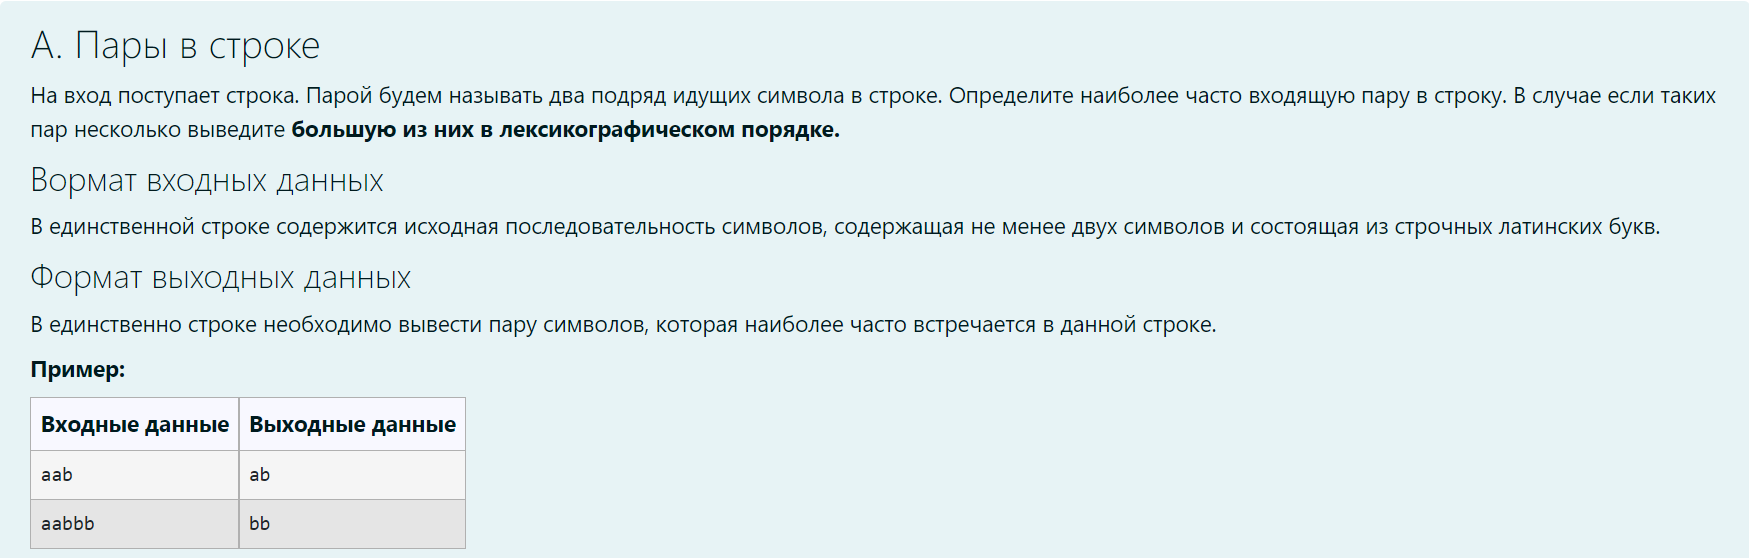

In [171]:
'''
> Составляю словарь из встречамых пар, подсчитывая их количество;
> Получаю дополнительные инструменты, создавая из словаря DataFrame;
> Сортирую столбцы по убыванию (Следуя условию на лексикографический порядок);
> Нахожу столбец, содержащий наибольшее вхождение пар.
'''
def task1solution(string):
  dictionary = {}

  for i in range(len(string)-1):
    if string[i]+string[i+1] in dictionary:
      dictionary[string[i]+string[i+1]] += 1
    else:
      dictionary[string[i]+string[i+1]] = 1

  df = pd.DataFrame(data=dictionary, index=[0])
  df = df.sort_index(axis = 1, ascending=False)
  result = df.idxmax(axis=1)[0]
  return result

def task1test(string, answer):
  if  task1solution(string) == answer:
    print(f'CORRECT: ({string}, {answer})')
  else:
    print(f'INCORRECT: ({string}, {answer})')

In [172]:
task1test('aab', 'ab')
task1test('aabbb', 'bb')
task1test('babbabababaaccc', 'ba')

CORRECT: (aab, ab)
CORRECT: (aabbb, bb)
CORRECT: (babbabababaaccc, ba)


## 2. Сумма блоков в матрице

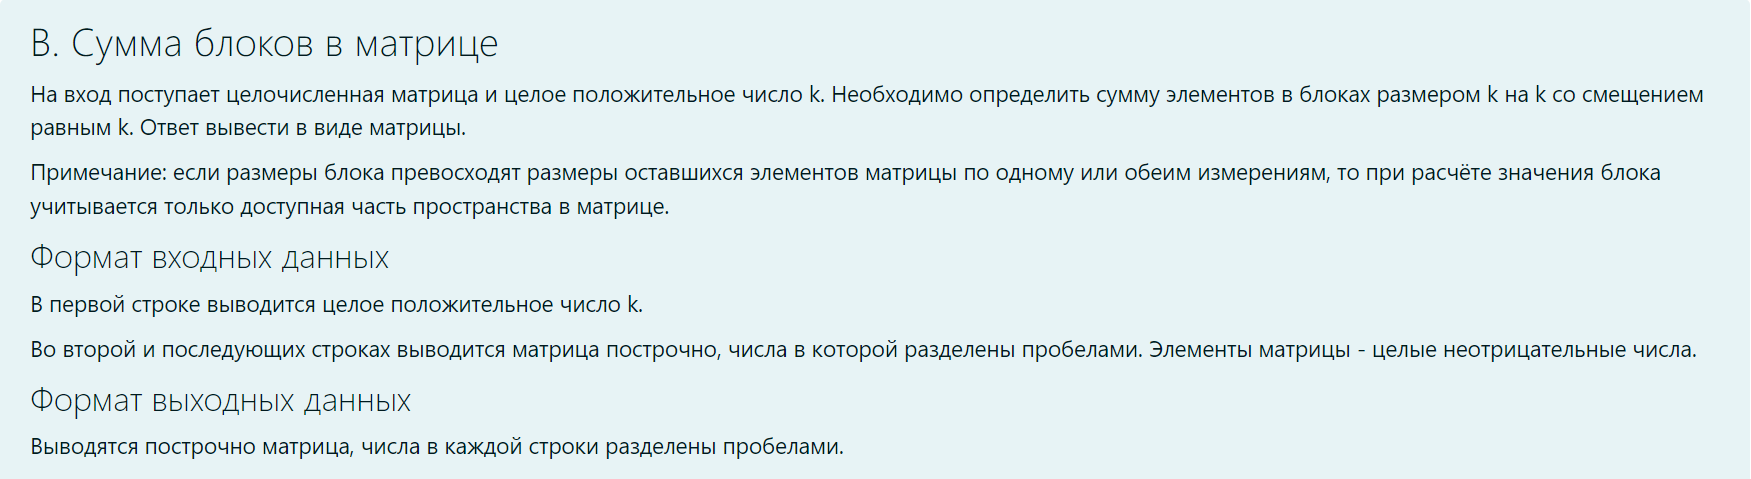
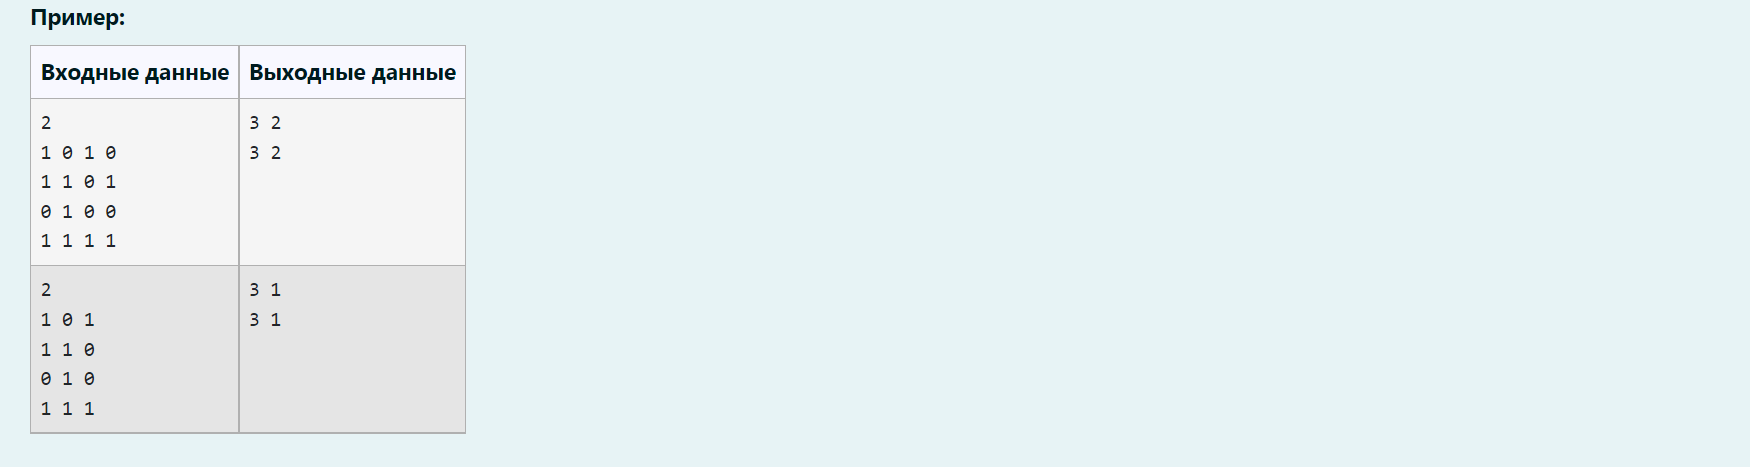

In [173]:
'''
> Если размерность исходной матрицы не делится нацело на входящее число, увеличиваю размерность, добавляя пустые строки\столбцы;
> Суммирую по блокам.
'''
def task2solution(number, matrix):
  Oindex = np.array([[0]*matrix.shape[1]])
  while(matrix.shape[0] % number != 0):
      matrix = np.insert(matrix, matrix.shape[0], values = Oindex, axis=0)

  Ocolumn = np.array([[0]*matrix.shape[0]])

  while(matrix.shape[1] % number != 0):
      matrix = np.insert(matrix, matrix.shape[1], values=Ocolumn, axis=1)

  result = np.array([[0]*(matrix.shape[0] // number)]*(matrix.shape[1] // number))

  for i in range(matrix.shape[0] // number):
      for j in range(matrix.shape[1] // number):
          result[i, j] = matrix[i*number:i*number+number, j*number:j*number+number].sum()
  return result

def task2test(number, matrix, answer):
  if np.allclose(task2solution(number, matrix), answer):
    print('CORRECT')
  else:
    print('INCORRECT')

In [174]:
task2test(2, np.array([[1, 0, 1, 0], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 1]]), np.array([[3, 2], [3, 2]]))
task2test(2, np.array([[1, 0, 1], [1, 1, 0], [0, 1 ,0], [1, 1, 1]]), np.array([[3, 1], [3, 1]]))
task2test(3, np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [9, 8, 7, 6, 5]]), np.array([[33, 37], [45, 30]]))

CORRECT
CORRECT
CORRECT


## 3. Уникальные строки

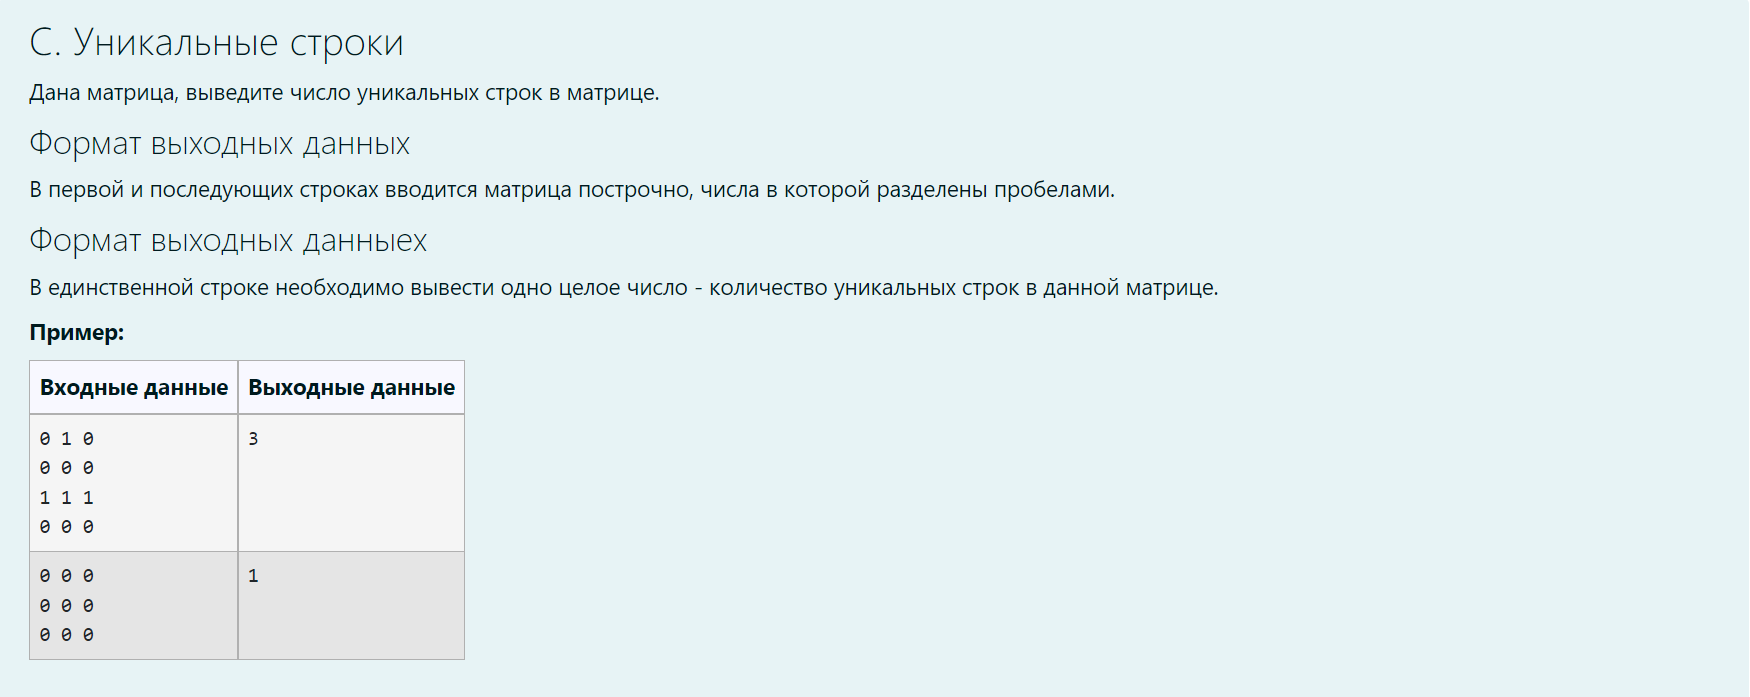

In [175]:
'''
> Создаю из np-матрицы DataFrame;
> Удаляю дублированные строки, сохраняя один экземпляр;
> Вывожу количество строк.
'''
def task3solution(matrix):
  df = pd.DataFrame(matrix)
  df = df.drop_duplicates(keep='first')
  result = df.shape[0]
  return result

def task3test(df, answer):
  if task3solution(df) == answer:
    print('CORRECT')
  else:
    print('INCORRECT')

In [176]:
task3test(np.array([[0, 1, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0]]), 3)
task3test(np.array([[0, 0, 0], [0, 0 ,0], [0, 0, 0]]), 1)
task3test(np.array([[np.NaN, 1, 2.0], [3, 10, 5], [np.NaN, 1, 2]]), 2)

CORRECT
CORRECT
CORRECT


## 4. Число единиц

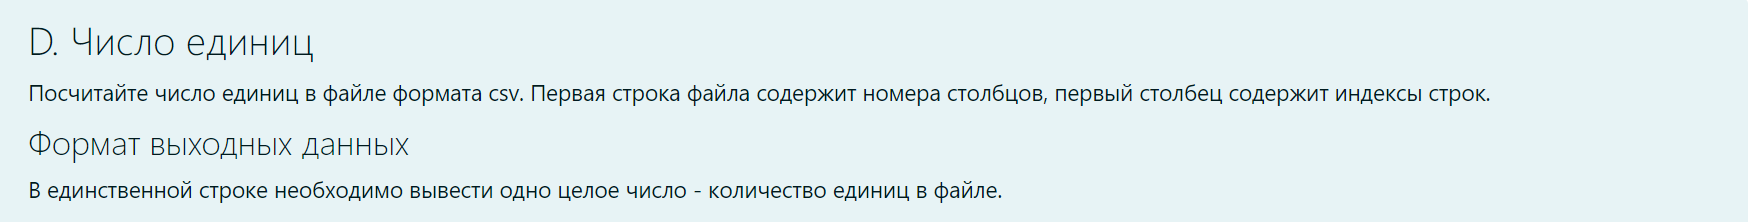
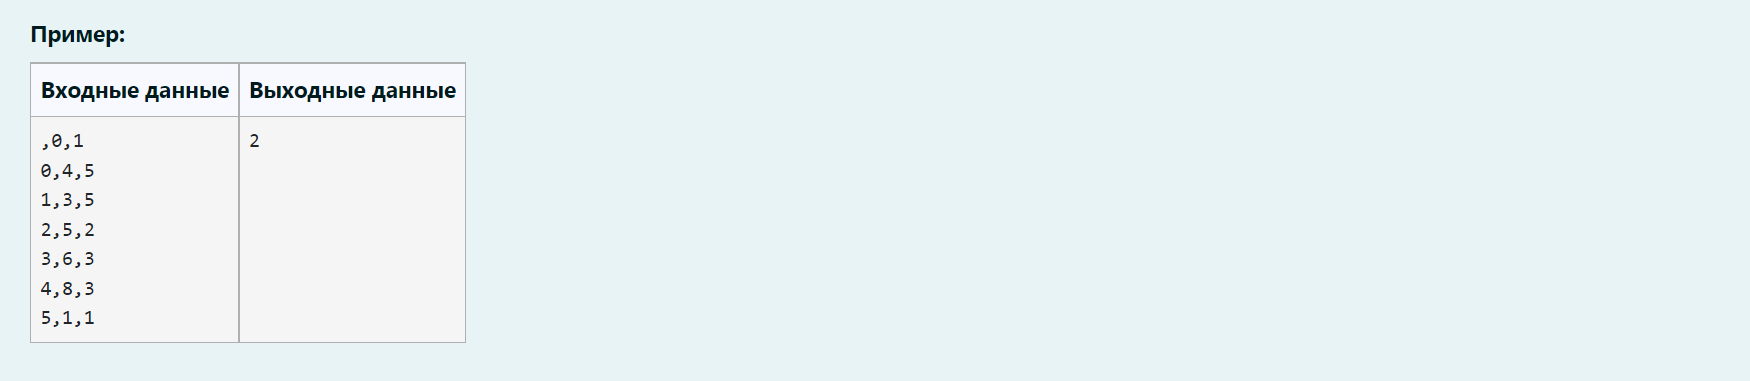

In [181]:
'''
> Единица == 1;
> Использовал стандартные функции pandas.
'''
def task4solution(matrix):
  df = pd.DataFrame(matrix[1:,1:], index=matrix[1:,:1].flatten(), columns=matrix[:1,1:].flatten())
  result = df[df == 1].count().sum()
  return result

def task4test(matrix, answer):
  if task4solution(matrix) == answer:
    print('CORRECT')
  else:
    print('INCORRECT')

In [182]:
task4test(np.array([[np.NaN, 0, 1], [0, 4, 5], [1, 3, 5], [2, 5, 2], [3, 6, 3], [4, 8, 3], [5, 1, 1]]), 2)
task4test(np.array([[0, 0, 0], [0, 0 ,0], [0, 0, 0]]), 0)
task4test(np.array([[3, 5, 20], [2, 1.0, np.NaN], [1, 11, 10], [np.NaN, np.NaN, 1]]), 2)
task4test(np.array([[np.NaN, 0, 1], [0, 1, 2], [1, 2, 1], [2, 2, 1]]), 3)
task4test(np.array([[np.NaN, 0, 1], [2, 1.0, np.NaN], [1, 11, 10], [np.NaN, np.NaN, 1]]), 2)

CORRECT
CORRECT
CORRECT
CORRECT
CORRECT


## 5. Наибольшее количество максимумов

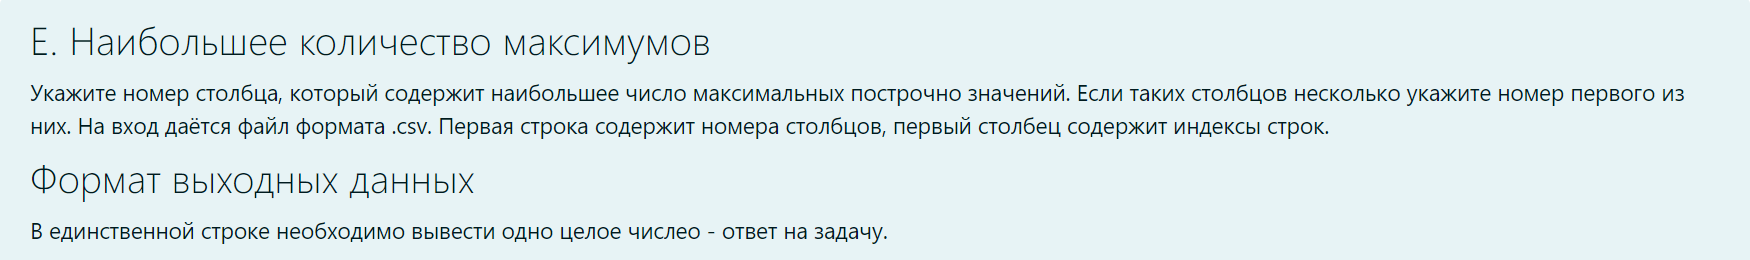
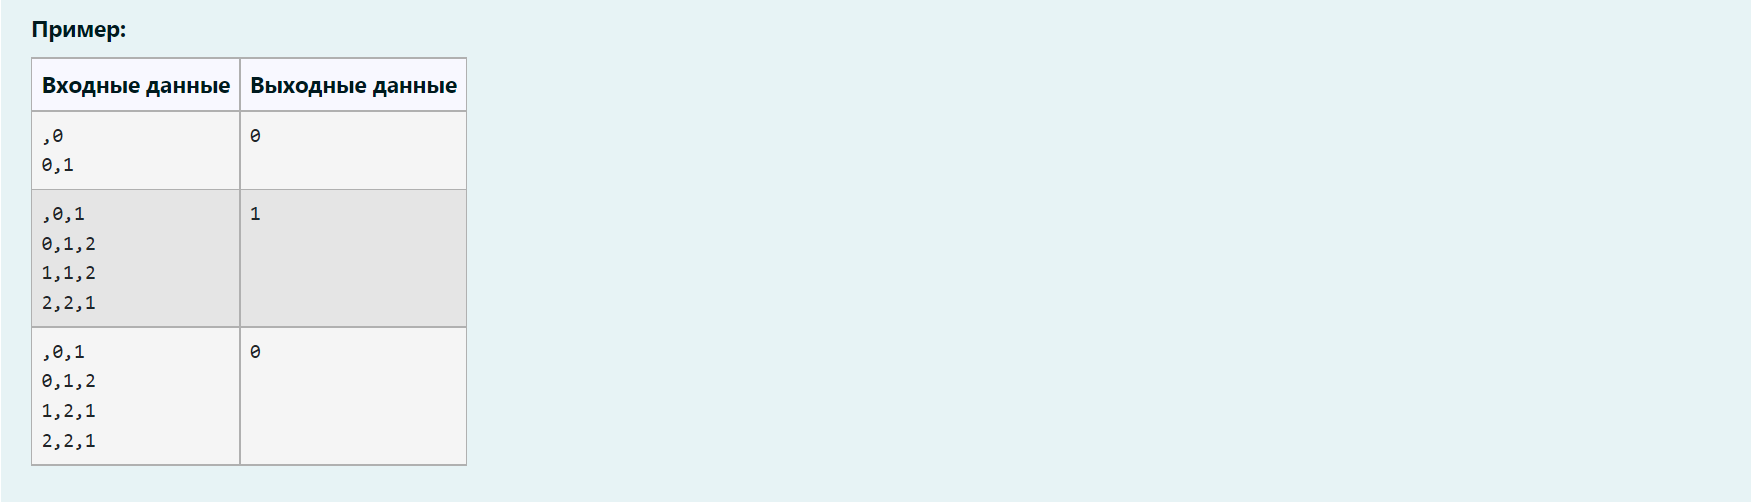

In [179]:
'''
> Создаю "DataFrame-маску" из единиц на месте максимальных в строке элементов;
> Вывожу номер столбца, который имеет наибольшее количество максимумов.
'''
def task5solution(matrix):
  df = pd.DataFrame(matrix[1:,1:], index=matrix[1:,:1].flatten(), columns=matrix[:1,1:].flatten())
  df = df.T
  df = df[df == df.max(axis = 0)]
  df = df.fillna(0)
  df = df.astype(bool).astype(int)
  df = df.T
  result = df.sum().idxmax()
  return result

def task5test(matrix, answer):
  if task5solution(matrix) == answer:
    print('CORRECT')
  else:
    print('INCORRECT')

In [180]:
task5test(np.array([[np.NaN, 0], [0, 1]]), 0)
task5test(np.array([[np.NaN, 0, 1], [0, 1, 2], [1, 1, 2], [2, 2, 1]]), 1)
task5test(np.array([[np.NaN, 0, 1], [0, 1, 2], [1, 2, 1], [2, 2, 1]]), 0)
task5test(np.array([[np.NaN, 0, 1], [0, 4, 5], [1, 3, 5], [2, 5, 2], [3, 6, 3], [4, 8, 3], [5, 1, 1]]), 0)
task5test(np.array([[np.NaN, 0, 1, 2, 3, 4, 5], [2, 100, np.NaN, 4, 72, 74, 37], [11, 74, 10, 74, 3, 9, 10], [np.NaN, np.NaN, 1, 100, 5, 6, 38]]), 0)

CORRECT
CORRECT
CORRECT
CORRECT
CORRECT
